In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [5]:
#CSN_path = './'
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

#CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list
CSN_test = CSN_hold_1[-tsize1:] # assign that 20 data examples whcih we will use later

CSN_new_err = CSN_test['Error']

In [4]:
out6 = np.load('Data/true_test_186_100_real_20_clydetookout_test20_L.pkl', allow_pickle=True)

In [6]:
CSN_new_err 
#these are error bars I read from the experimental papers 

100   0.00000
91    0.05880
111   0.85426
47    0.05255
82    0.00690
53    0.12730
147   0.02135
74    0.06983
79    0.26790
64    0.06980
48    0.09938
160   0.06522
66    0.15030
114   0.43488
201   0.00000
28    0.00000
149   0.01799
5     0.14197
198   0.00000
17    0.21624
Name: Error, dtype: float64

0.2728885152935982
0.3548976027965546
0.11755950888633726
0.16321588929576114
0.28495807430383685
0.1960571869621277
0.1962559696400834
0.23911852148771284
0.31700687468051914
0.512980170249939
0.13334860431557471
0.23056274712085723
0.985315421938896
0.3518480715084076
0.22584961533546444
0.30889499151706706
0.2071587438613891
0.9450301764005975
0.14914003670215603
0.1021719385112686


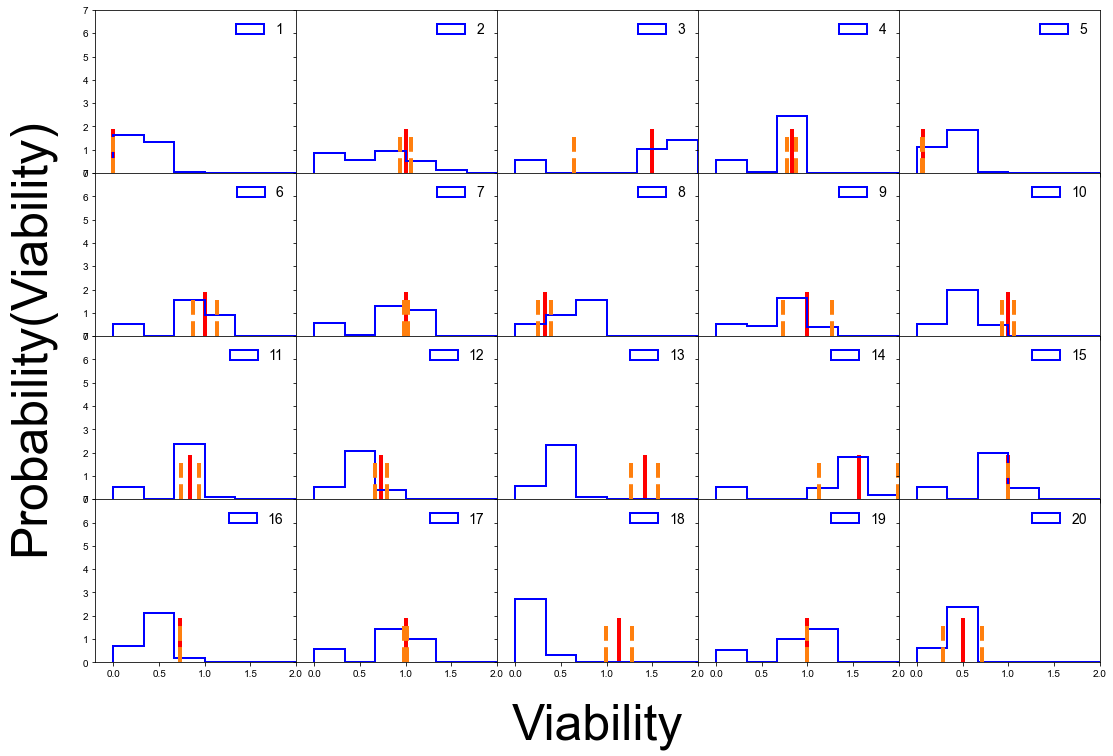

In [20]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out6[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [9]:
   a_list =[]
b_list =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out6[:, 0, 0, i])
            b_list.append(M)

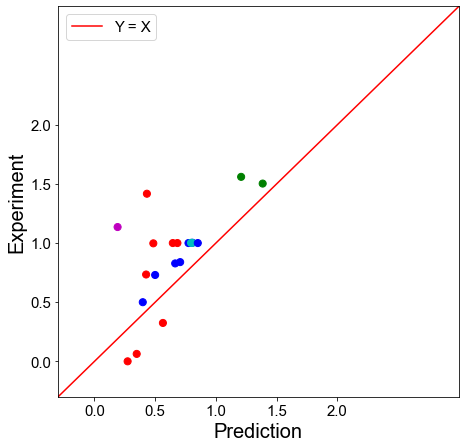

In [10]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3667372144706629
0.2999946372783424
0.011237872295169815
0.11141618989856772
0.35392662348745385
0.12012310603130072
0.12247414509759669
0.3085298728529341
0.27385232788923786
0.4756653869421541
0.08749518745347029
0.18576303602497002
0.9423423419825048
0.24355645993872987
0.15220685577883908
0.2888679257300299
0.14117522933935422
0.9439133805097382
0.02577591833397519
0.05987979702490903


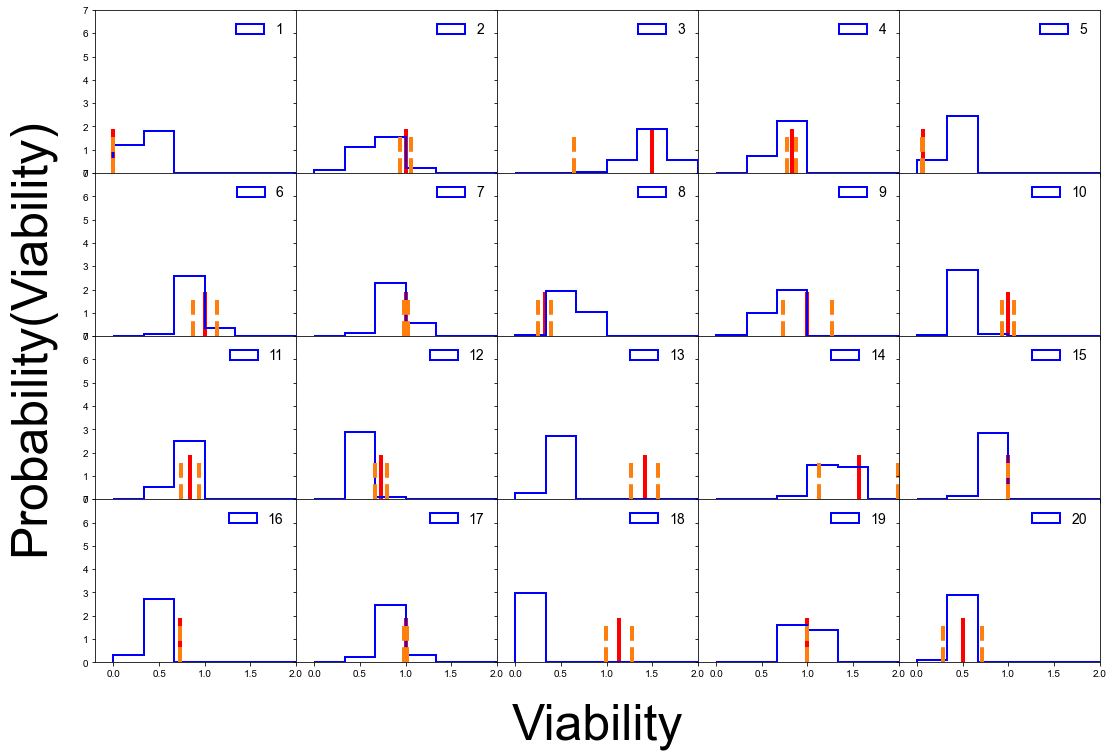

In [21]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 1, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out6[:, 1, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [13]:
   a_list =[]
b_list =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out6[:, 1, 0, i])
            b_list.append(M)

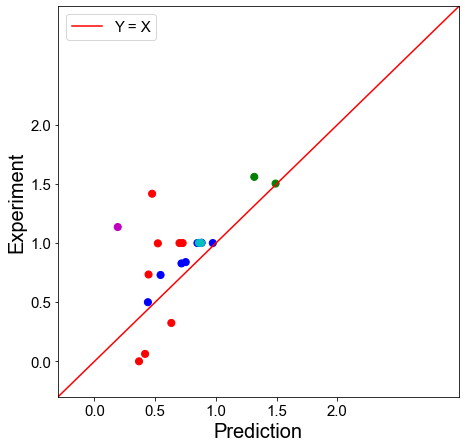

In [14]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3440372337324986
0.23468371356449114
0.04304956735286569
0.08432851162187849
0.35889112698940173
0.08932742111535241
0.09914252360564435
0.3292843686650614
0.2247224571516614
0.4448622152794234
0.055704727456771685
0.16105357752768712
0.9196874299570863
0.18635350171192266
0.12080330012728913
0.2604061607927814
0.1118257476281227
0.9230138726974303
0.028666919850015904
0.0492950615972908


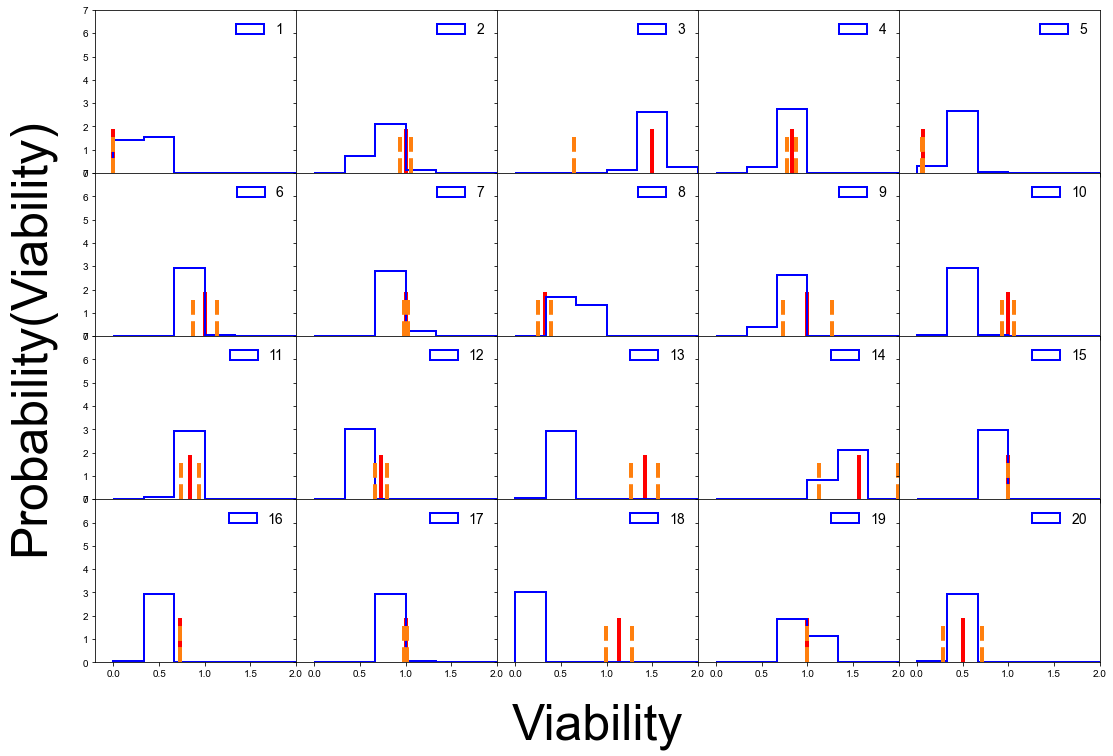

In [22]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 2, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out6[:, 2, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [23]:
   a_list =[]
b_list =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out6[:, 2, 0, i])
            b_list.append(M)

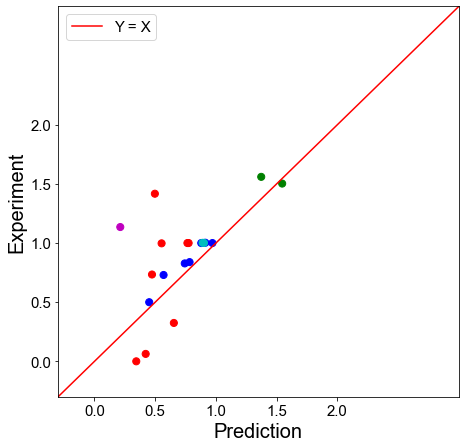

In [24]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.33255109567158925
0.24581669377098558
0.049715999705992386
0.08386385126242624
0.3407086863078998
0.09450730087072556
0.09383898981999272
0.3231290031997476
0.2331367215685095
0.4469853216868269
0.05470602841120664
0.16065054321531158
0.9224157514114282
0.18515989179150916
0.12319869679154483
0.2631919261057099
0.10484148896669199
0.9239064334716862
0.026927500254820602
0.04850067900639038


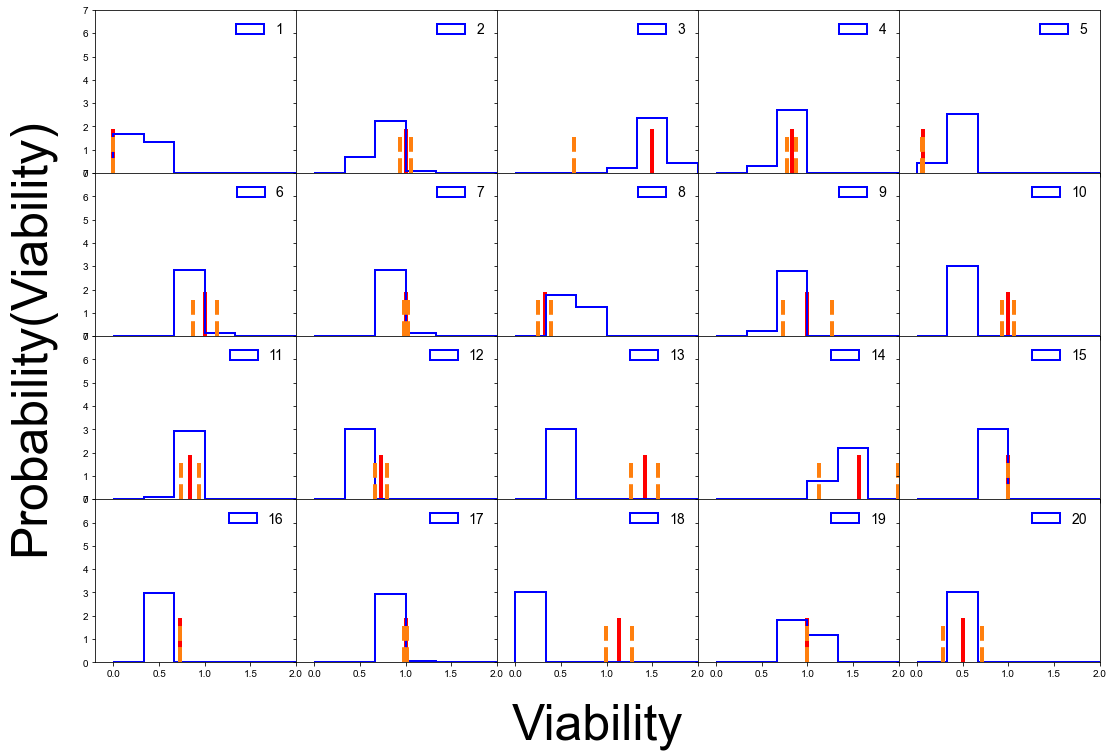

In [26]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 3, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out6[:, 3, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [27]:
   a_list =[]
b_list =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out6[:, 3, 0, i])
            b_list.append(M)

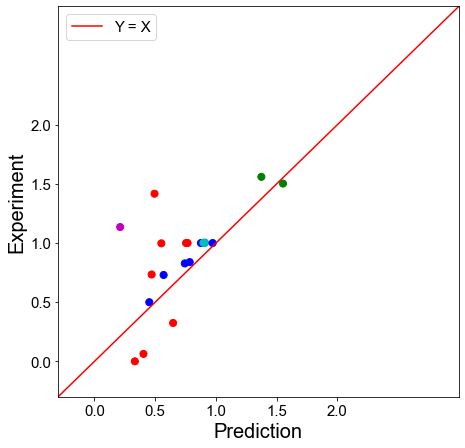

In [28]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()